![](http://4.bp.blogspot.com/-vKTlnfnQDVk/VfDW2jkqoyI/AAAAAAABU_o/BvQZMfZqAho/s1600/mnist.JPG)

# What is MNIST Dataset?

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology. The data is taken from 250 different people which include 50% students and 50% employee from Census Bureau. The purpose of the database is to use it for training and testing in the field of machine learning. 

MNIST is like the "Hello World" of machine learning. Its a database of handwritten digits (0-9), with which you can try out a few machine learning algorithms. The MNIST database contains 60,000 training images and 10,000 testing images.It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The purpose of this notebook is to read the MNIST dataset efficiently into memory in Python.


### Imports

In [13]:
import numpy as np
import os
import urllib.request
import gzip
import matplotlib.pyplot as plt


In [16]:
%%html
<!--- This is for the tableto be situated/alligned to the left -->
<style>
table {float:left}
</style>

### Download the dataset to a folder

In [2]:
# First make a folder which will store the the downloads
path = 'data/'

# If the file does not exist then make a new file 
# This makes sure that a file is made even when it doesnt exist
if not os.path.exists(path):
    os.makedirs(path)

### Get the file url from [Data Set website](http://yann.lecun.com/exdb/mnist/) 

In [3]:
# This is the url we will download the file from 
# This has all the train images from the database 
url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'

# "Method returns a list of strings after breaking the given string by the specified separator"
# im using the split method to get the last value whic is the name of the file
#filename = url.split('/')[5] # i could do it this way or go to the last value
file = url.split('/')[-1]

#if the file that im downloading already exists
# Then it will not download it 
if os.path.exists(path+file):
    print('The File Youre trying to download already exists!', file)
else:
    #if the file does not exist the it will download the file 
    print('The',file, 'Is Downloading')
    urllib.request.urlretrieve (url, path+file)
    
# This here shows how many files exist in the directory 
print()
print('These are the files in the Directory')
os.listdir('data')


The File Youre trying to download already exists! train-images-idx3-ubyte.gz

These are the files in the Directory


['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

### Dowload the rest of the files

In [4]:
# This will store all the rest of urls that i need to download
# The Train labels/Test Images /Test Labels
urls = ['http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

# We can go through a for loop and download the files
for url in urls:
    # We can then split each url to just the file name 
    file = url.split('/')[-1]
    # print(file)
    
    #Now in the for loop check if the file exists 
    #if the file that im downloading already exists
    # Then it will not download it 
    if os.path.exists(path+file):
        print('The File Youre trying to download already exists!', file)
    else:
         #if the file does not exist the it will download the file
        print('The',file, 'Is Downloading')
        urllib.request.urlretrieve (url, path+file)
        
# This here shows how many files exist in the directory
# It should have 4 different files in the folder 
print()
print('These are the files in the Directory')
#lists the directory
os.listdir('data')

The File Youre trying to download already exists! train-labels-idx1-ubyte.gz
The File Youre trying to download already exists! t10k-images-idx3-ubyte.gz
The File Youre trying to download already exists! t10k-labels-idx1-ubyte.gz

These are the files in the Directory


['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

### Read the contents of the file 

#### TRAINING SET IMAGE FILE (train-images-idx3-ubyte)

|Offset | Type               | Value           |   Description                   |
|:------|:-------------------|:----------------|:--------------------------------|
|0000   |32 bit integer      |0x00000801(2051) |magic number                     |
|0004   |32 bit integer      |10000 or 60000   |number of images                 |
|0008   |32 bit integer      |28               |number of rows                   |
|0012   |32 bit integer      |28               |number of columns                |
|0016   |unsigned byte       |??               |pixel                            |
|0017   |unsigned byte       |??               |pixel                            |
|...    |...                 |...              |...                              |
|xxxx   |unsigned byte       |??               |pixel                            |

<br/>
<center> Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).</center> 

In [19]:
# open the file and read the contents of the file to a variable called fileC
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fileC = f.read()

In [24]:
#The first 4 bits means its a magic number 
fileC[0:4] #The magic number is an integer (MSB first). The first 2 bytes are always 0. 
# The third byte codes the type of the data: 
#The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices

b'\x00\x00\x08\x03'

In [23]:
#The actual value in int
int.from_bytes(fileC[0:4], byteorder='big')

2051

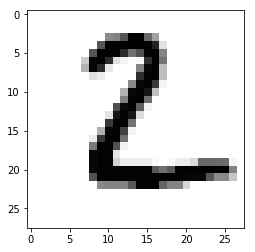

In [25]:
image = ~np.array(list(fileC[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

### Links
[What is MNIST?](https://en.wikipedia.org/wiki/MNIST_database)<br/>
[How to make a directory?](https://thispointer.com/how-to-create-a-directory-in-python/) <br/>
[Split()](https://www.geeksforgeeks.org/python-string-split/)<br/>
[Dowload http file in Python](https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python)<br/>
[Download Files with Python](https://stackabuse.com/download-files-with-python/)<br/>
[How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)<br/>